# Assessment Review

The topics covered will be:

1. Normal Distributions
2. Statistical Tests
3. Bayesian Statistics
4. Linear Regression

In [49]:
# from src.call import call_on_students

## Part 1: Normal Distributions

In this part, you will analyze hours of sleep for Freshman at a University. We know that the population distribution of hours of sleep for Freshman at the University is normally distributed with a mean of 6 and a standard deviation of 2.

### Task 1: Create a numeric variable `z_eight` that contains the z-score for a Freshman that sleeps 8 hours 

In [50]:
# call_on_students(1)

In [51]:
# Code here
from scipy import stats
z_eight = (8-6)/2

### Task 2: Create a numeric variable `over_eight` containing the approximate proportion of Freshman who get more than 8 hours of sleep

In [52]:
# call_on_students(1)

In [53]:
# Code here

over_eight = stats.norm.sf(z_eight)

over_eight

0.15865525393145707

### Task 3: Calculate a 95% confidence interval for the amount of sleep for one Freshman who sleeps 7 times with a mean of 5 hours and a standard deviation of 0.5 hours

In [54]:

# call_on_students(1)

In [93]:
# Code here
import numpy as np

alpha = .95
n = 7
x_bar = 5
sigma = .5
standard_error = sigma/np.sqrt(n)

stats.t.interval(alpha = .95, df= n-1, loc= x_bar, scale = standard_error )

(4.53757712628571, 5.46242287371429)

### Task 4: Interpret the 95% Confidence Interval that you derived in the above question

In [56]:
# call_on_students(1)

Interpret: 

- The confidence interval for the above t test is (4.53757712628571, 5.46242287371429). This means that for a given student there they will have 3.77 hours of sleep or 6.22 within that interval with a 95% certainty.


## Part 2: Hypothesis Testing

Let's make some hypotheses about cars!

### Task 5: Set Up

In [57]:
# call_on_students(1)

In [58]:
# Imports - need pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
# Import the auto-mpg csv from the data folder
df = pd.read_csv("auto-mpg.csv")

In [60]:
# Check the head of our data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [61]:
# Check the info on our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [62]:
# Describe the data
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


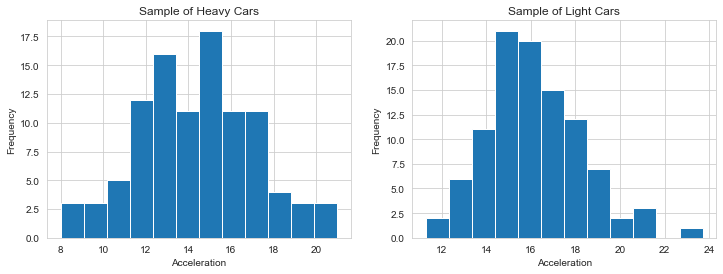

In [63]:
# Run this cell without changes to set up for the next set of questions

# Grabbing the median car weight
weight_median = df['weight'].median()

# Separating based on light cars and heavy cars
heavy_cars = df.loc[df['weight'] > weight_median].sample(n=100, random_state=42)
light_cars = df.loc[df['weight'] <= weight_median].sample(n=100, random_state=42)

# Plotting histograms for acceleration for both light and heavy cars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Heavy Cars')
ax1.set_xlabel('Acceleration')
ax1.set_ylabel('Frequency')
ax1.hist(heavy_cars['acceleration'], bins=12)

ax2.set_title('Sample of Light Cars')
ax2.set_xlabel('Acceleration')
ax2.set_ylabel('Frequency')
ax2.hist(light_cars['acceleration'], bins=12)
plt.show()

### The Prompt: 

> Car manufacturers want to know if light cars accelerate faster than heavy cars.

### Task 6: Set up the null and alternative hypotheses for this test

In [64]:
# call_on_students(1)

**Null hypothesis:**

- weight has no effect on rate of acceleration


**Alternative hypothesis:**

- weight has an effect on acceleration rate


### Task 7: Describe your Type 1 and Type 2 errors in this context

In [65]:
# call_on_students(1)

**Type I Error:**

- flase positive errors, rejecting our null hypothesis that weight has no affect on the rate of acceleration when in fact weight does have an affect on rate of acceleration


**Type II Error:**

- false negative: our sample supports that weight has a pisitve affect on acceleration rate when it in fact does not



### Task 8: The Hypothesis Test!

### 8a: Describe the type of test:

In [66]:
# call_on_students(1)

Description:

- two sample ttest


### 8b: Run the test, using alpha = .05 and assuming that the samples have equal variance

In [67]:
# call_on_students(1)

In [94]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [100]:
# Code here
alpha = .05
stats.ttest_ind( light_cars["acceleration"], heavy_cars["acceleration"])

Ttest_indResult(statistic=5.00874014469676, pvalue=1.2096440668168987e-06)

## 8c: Analyze your results: can you reject the null hypothesis?

In [69]:
# call_on_students(1)

Can you reject the null hypothesis?

- 


## Part 3: Bayesian Statistics

$$ P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$$

### The Prompt: 
> In the second session of the 98th congress in 1984, a congressman voted 'No' on providing aid to El Salvador. 
> 
> Given that 60% of the congress were Democrats, 75% of whom voted 'No' for providing aid to El Salvador, and only 5% of Republicans voted 'No' to the proposal, what is the conditional probability that this individual is a Democrat?

### Task 9: Calculate the probability

In [70]:
# call_on_students(1)

In [102]:
((.75)*(.6))/ (((.75)*(.6))+((.05)*(.4)))

0.9574468085106382

**1. Which probability are we trying to find?**

   - WHat is the probabilty that a congress man is a democrat given they voted no.
   #P(demo|no) = P(no|demo)P(demo)/ P(no)
      - (.75)(.6)/ (.75)(.6)+(.05)(.4)
    
**2. Based on that, what other pieces do we need?**

   - please use bayes therom to undestand my answer.
    
    
**3. Result?**

   - 0.95
    

## Part 4: Simple Linear Regression

**BACK TO CARS**

### The Prompt:

> Car manufacturers have asked us to predict how many miles per gallon a car can run based on the other variables we have in the data we're given. 

Sounds like a regression problem! But first let's further explore the data.

### Task 10: Explore the Data Visually

In [72]:
import seaborn as sns

In [73]:
# call_on_students(1)

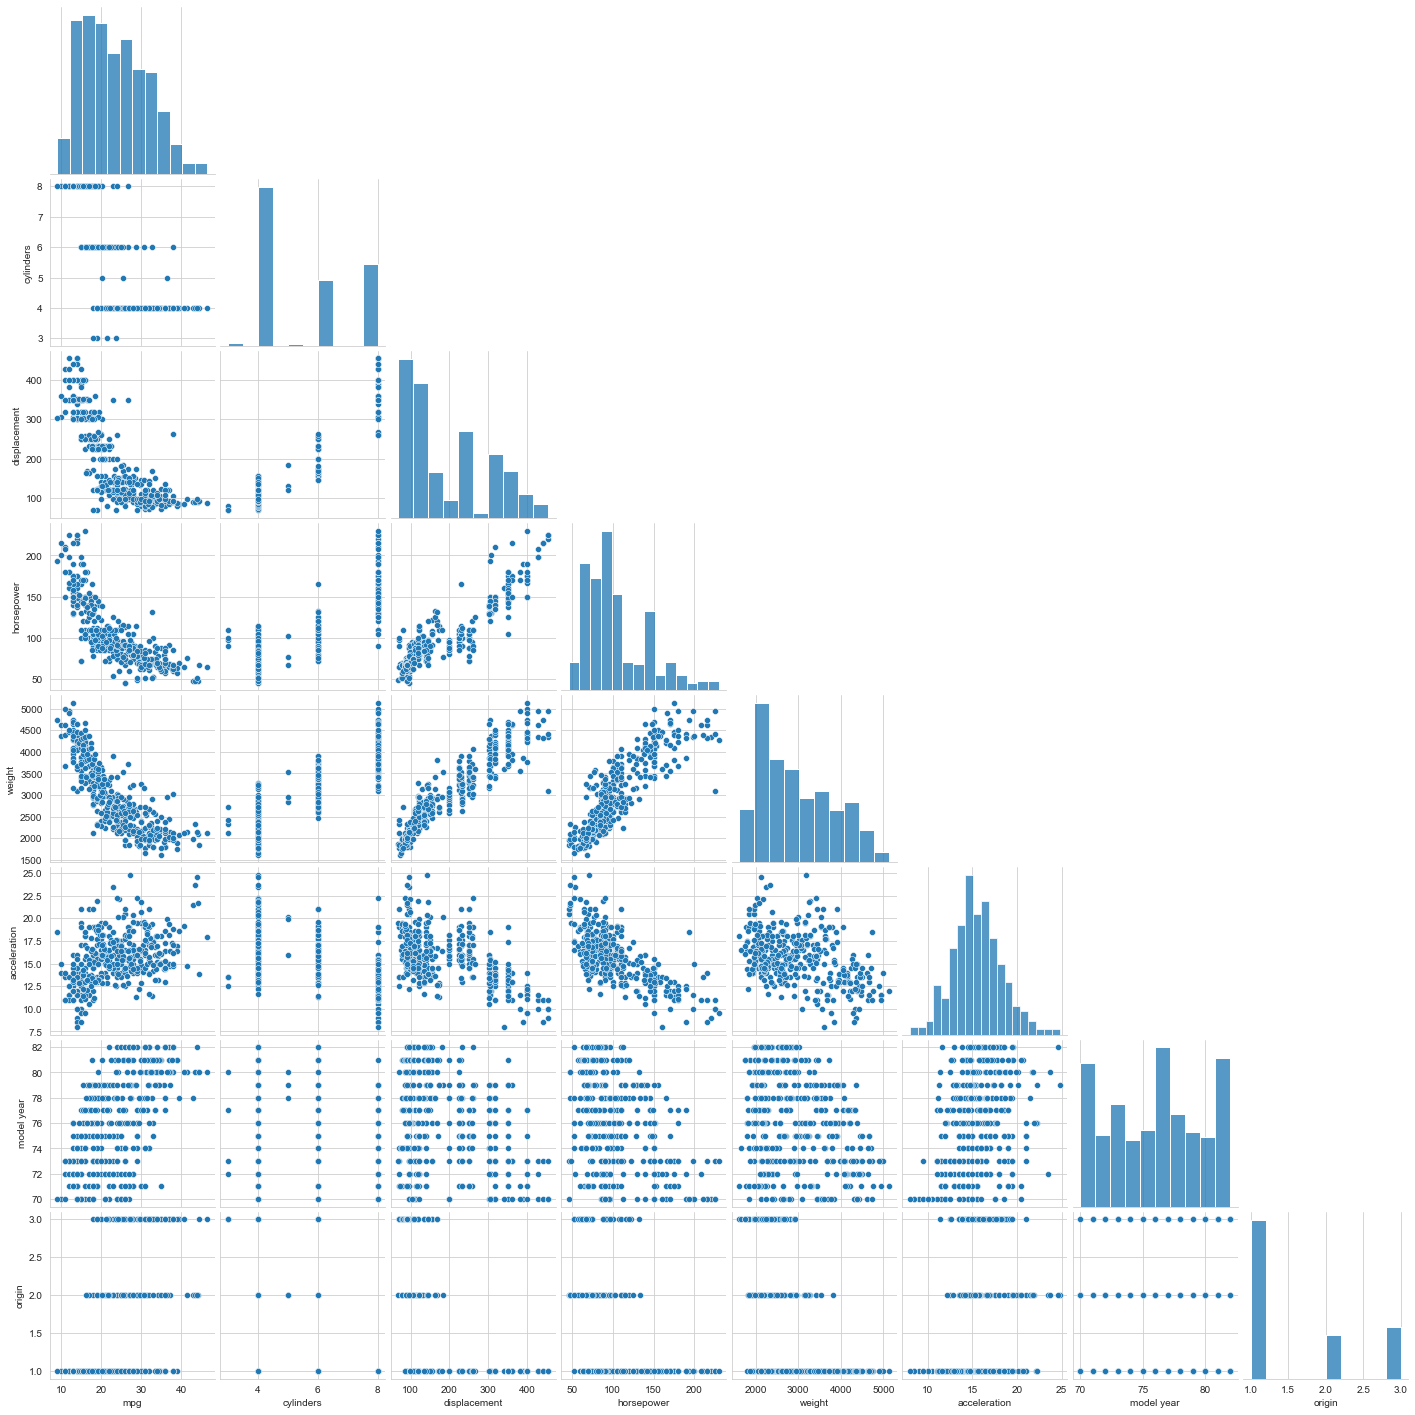

In [103]:
# Make a pairplot using seaborn to examine the relationships between variables
# Note - do this on the whole dataframe, not just independent variables


df = pd.read_csv("auto-mpg.csv")

sns.pairplot(df,corner = True)

<AxesSubplot:>

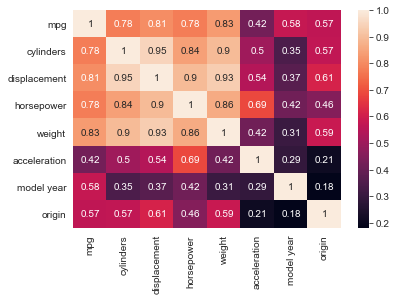

In [104]:
# Create a correlation heatmap as well, with seaborn plus the 'corr' function
sns.heatmap(df.corr().abs(), annot = True)

### Task 11: Explore your variables

Look at both at the pairplot and the correlation heatmap - what are some trends you see? Any potential problems?

Here, we expect you to look at what kinds of data you have. You may also want to discuss how the data is distributed. Analyze both the relationships between independent variables and the relationships between independent variables and your target/dependent variable (miles per gallon).

In [76]:
# call_on_students(1)

In [77]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


**Observations:**

- there are some features that should not be used in a linear regression for instance the origin of the vehicle and the car name.


### Task 12: Pick one X variable and model

Pick the variable you think would be best to use to predict MPG, and create, fit and summarize the output of a statsmodels OLS model!

Set the summary output equal to `simple_model_summary`

In [78]:
import statsmodels.api as sm
#from statsmodels.formula.api import ols

In [79]:
# call_on_students(1)

In [105]:
# Either define X and y (if using OLS) or define your formula (if using ols)
# Make sure that if you use OLS to add a constant to your X!

X = df["weight"]
y = df["mpg"]
X = sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()

In [106]:
simple_model_summary = results.summary()

simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Thu, 08 Sep 2022   Prob (F-statistic):          6.02e-102
Time:                        17:08:40   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Task 13: Interpret!

In [82]:
# call_on_students(1)


There are many things you could observe from this output, but I want especially for you to make an inference about the relationship between the X variable and MPG.

-  Here we see that our R^2 is not very hgih only .3, meaning that our X was not sufficent to predict mpg.


### Task 14: Model with all numeric X variables

Create, fit and summarize the output of a statsmodels OLS model that has all of the possible X variables in our dataset!

Set the summary output equal to `model_summary`

In [83]:
# Want to use 'cylinders', 'displacement', 'horsepower', 'weight' and 'acceleration'
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [84]:
# call_on_students(1)

In [108]:
# Either define X and y (if using OLS) or define your formula (if using ols)
# Make sure that if you use OLS to add a constant to your X! 
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y =df ["mpg"]
X = sm.add_constant(X)
model =sm.OLS(y,X)
results = model.fit()

In [86]:
model_summary = results.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     186.9
Date:                Thu, 08 Sep 2022   Prob (F-statistic):          9.82e-101
Time:                        16:15:54   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2252.
Df Residuals:                     386   BIC:                             2276.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           46.2643      2.669     17.331      0.000      41.016      51.513
cylinders       -0.3979      0.411     -0.969      0.333      -1.205       0.409
displacement -8.313e-05      0.009     -0.009      0.993      -0.018       0.018
horsepower      -0.0453      0.017     -2.716      0.007      -0.078      -0.012
weight          -0.0052      0.001     -6.351      0.000      -0.007      -0.004
acceleration    -0.0291      0.126     -0.231      0.817      -0.276       0.218
==============================================================================
Omnibus:                       38.561   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.737
Skew:                           0.706   Prob(JB):                     3.53e-12
Kurtosis:                       4.111   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Task 15: Interpret!


In [87]:
# call_on_students(1)

Specifically, compare this model summary to your simple model's summary.

- Wow, look at that, its almost like a prepared example to practice linear regression was intentially  made to increase R^2 values with more fratures!! AMAZING!
